In [ ]:
#from google.colab import drive
#drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
from google.colab import files
unemp_path = files.upload()

Saving Unemployment in India.csv to Unemployment in India.csv


In [51]:
import pandas as pd
df = pd.read_csv('Unemployment in India.csv')

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
print('\nData Info:\n')
df.info()


Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
#Handling missing values (dropping them in this case)
df.dropna(inplace=True)

In [ ]:

#Converting Date to a standard date format
df[' Date'] = pd.to_datetime(df[' Date'], errors='coerce')

In [ ]:

# Ensure numerical columns are in the right format
numeric_columns = [' Estimated Labour Participation Rate (%)', ' Estimated Employed', ' Estimated Unemployment Rate (%)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Checking data after cleaning
print("\nDataset After Cleaning:\n")
print(df.head())


Dataset After Cleaning:

           Region       Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31    Monthly                              3.65   
1  Andhra Pradesh 2019-06-30    Monthly                              3.05   
2  Andhra Pradesh 2019-07-31    Monthly                              3.75   
3  Andhra Pradesh 2019-08-31    Monthly                              3.32   
4  Andhra Pradesh 2019-09-30    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


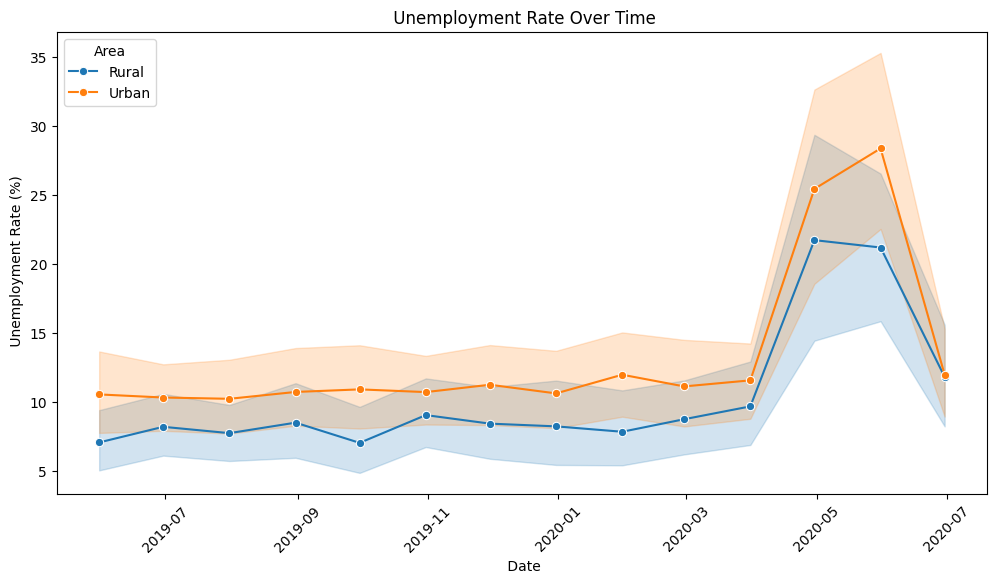

In [ ]:

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=" Date", y=" Estimated Unemployment Rate (%)", hue="Area", marker="o")
plt.title(" Unemployment Rate Over Time")
plt.xlabel(" Date")
plt.ylabel(" Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(title="Area")
plt.show()

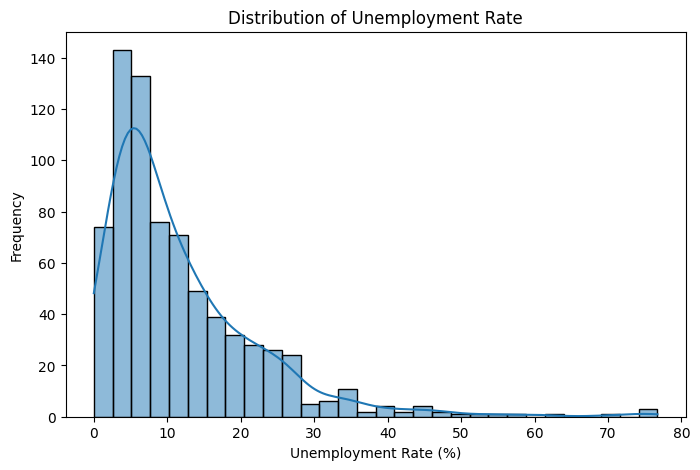

In [49]:
#Unemployment rate distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[' Estimated Unemployment Rate (%)'], bins=30, kde=True)
plt.title("Distribution of Unemployment Rate")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

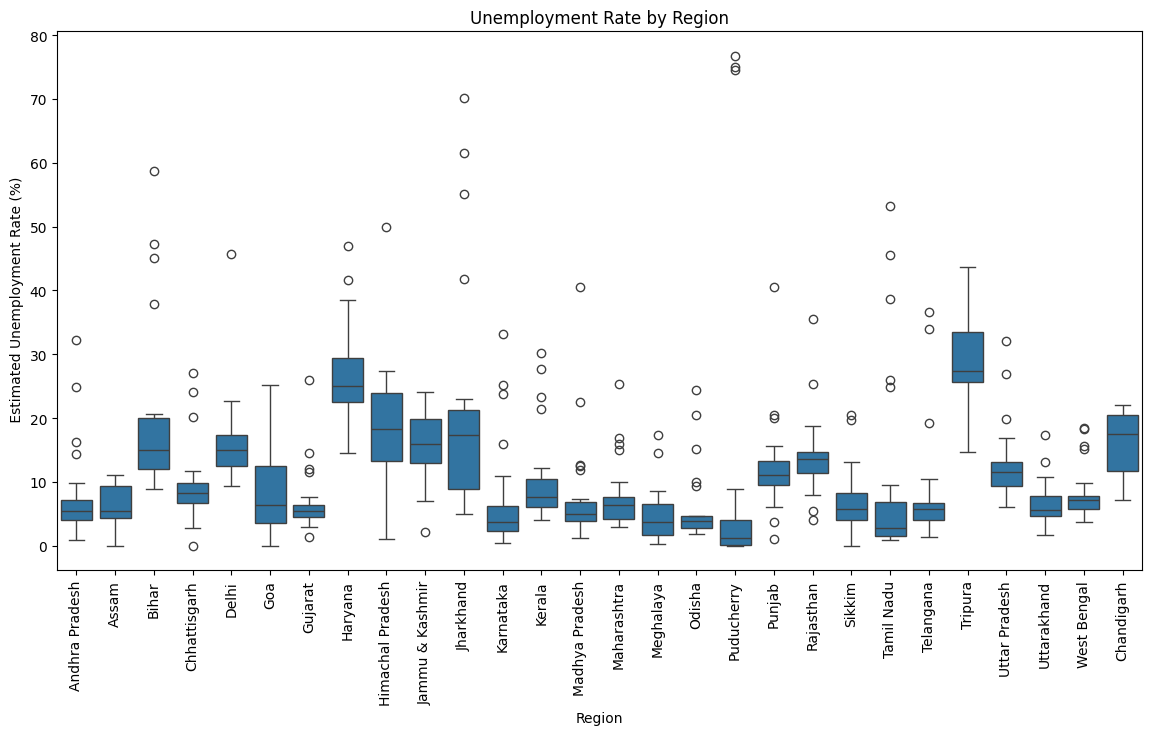

In [50]:
#Regional Unemployment Trends
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x="Region", y=" Estimated Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.show()